<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/30_Visualize_Conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization Conclusion


What do you think will be on the exam?

## Why Do We Visualize

Visualization allows use to see many datapoints and once.  It allows us to compare those points quickly and efficiently.  It allows us to see trends and look for interesting aspects about our data that may be hard to parse out without a graphic.  Graphics we have done in this course.



*   Bar Chart
*   Histogram
*   Violin Plot
*   Box and Whisker Plot
*   Scatter Plot
*   Correlation Heatmap
*   Error Bars
*   Pie Charts
*   Mosaic Plots



In [2]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


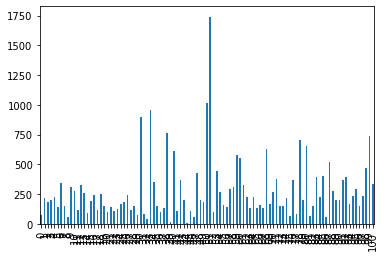

In [31]:
df.loc[:100].duration.plot.bar()

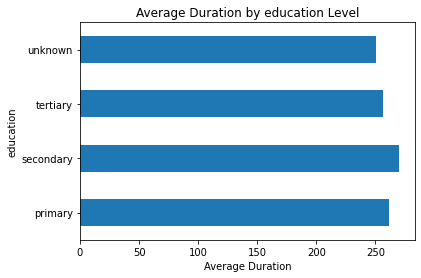

In [15]:
ax = df.groupby('education').duration.agg('mean').plot.barh()
ax.set(title = "Average Duration by education Level")
ax.set(xlabel = 'Average Duration')
plt.show()

What does this graph show?  Everybody has about the same duration...

## Histogram

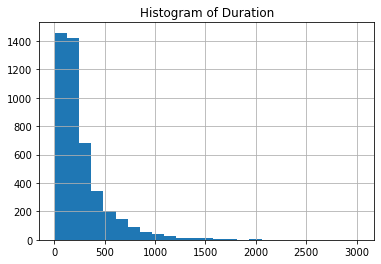

In [21]:
ax = df.duration.hist(bins = 25)
ax.set(title = "Histogram of Duration")
plt.show()

Looks like there are some serious outliers in duration

## Violin

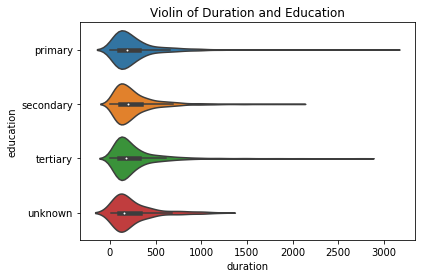

In [27]:
ax = sns.violinplot(data = df, x = 'duration', y = 'education')
ax.set(title = 'Violin of Duration and Education')

plt.show()

Seems like the unknowns dont have the outliers.  Perhaps only un-educated and over-educated have longer waits.

## Box and Whisker

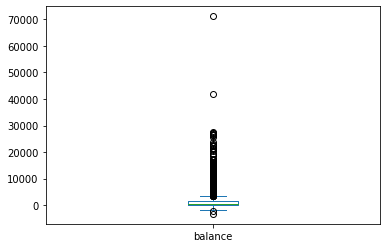

In [28]:
df.balance.plot.box()

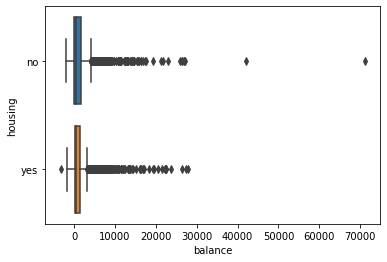

In [29]:
sns.boxplot(data = df, x = 'balance', y = 'housing')

More than $3k is an outlier!

## Scatterplot

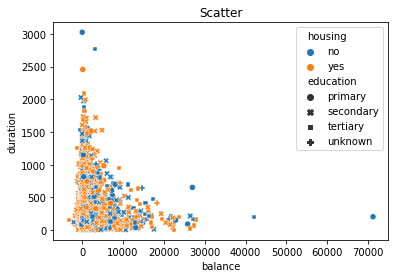

In [38]:
ax = sns.scatterplot(data = df, x = 'balance', y = 'duration', hue = 'housing', style= 'education')
ax.set(title = "Scatter")

plt.show()

Non-linear trend!  No money: Wait!:: Lot's of money:Close the deal!

## Correlation Heatmap

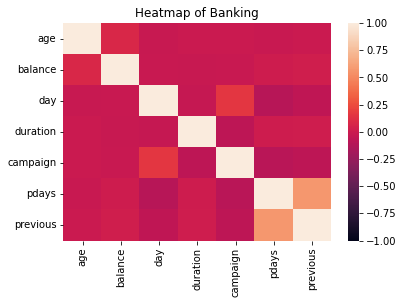

In [44]:
ax = sns.heatmap(df.corr(),vmin = -1)
ax.set(title = 'Heatmap of Banking')

plt.show()

campagin and day seem to have some correlation.

## Error Bars

In [50]:
df.groupby('education').duration.agg(['mean', 'std', 'count'])

,mean,std,count
education,,,
primary,261.709440,271.988443,678
secondary,269.863833,260.896979,2306
tertiary,256.881481,254.290937,1350
unknown,250.449198,241.189640,187


In [54]:
import numpy as np

df1 = df.groupby('education').duration.agg(['mean', 'std', 'count'])
def SE(std,n):
  return 2*std/np.sqrt(n)


df1['SE'] = df1.apply(lambda x: SE(x['std'],x['count']), axis = 1)








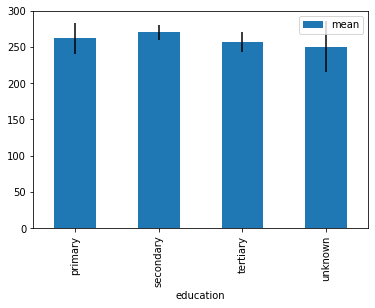

In [55]:
df1.plot.bar(y = 'mean', yerr = 'SE')
ax.set(title = "Average Duration by education Level")
ax.set(xlabel = 'Average Duration')
plt.show()

All have the same mean...

## Your Turn

Sumbit at least two graphics you made while thinking about what may be on the exam.